In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy.stats as stats

In [2]:
customer=pd.read_csv('C:\End\CUSTOMERS.csv')
geolocation=pd.read_csv('C:\End\GEO_LOCATION.csv')
orderitems=pd.read_csv('C:\End\ORDER_ITEMS.csv')
orderpayments=pd.read_csv('C:\End\ORDER_PAYMENTS.csv')
orderreviewratings=pd.read_csv('C:\End\ORDER_REVIEW_RATINGS.csv')
orders=pd.read_csv('C:\End\ORDERS.csv')
products=pd.read_csv('C:\End\PRODUCTS.csv')
sellers=pd.read_csv('C:\End\SELLERS.csv')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')
orders.order_approved_at=pd.to_datetime(orders.order_approved_at,format='%m/%d/%Y %H:%M')
orders.order_delivered_carrier_date=pd.to_datetime(orders.order_delivered_carrier_date,format='%m/%d/%Y %H:%M')
orders.order_delivered_customer_date=pd.to_datetime(orders.order_delivered_customer_date,format='%m/%d/%Y %H:%M')
orders.order_estimated_delivery_date=pd.to_datetime(orders.order_estimated_delivery_date,format='%m/%d/%Y %H:%M')
orderreviewratings.review_creation_date=pd.to_datetime(orderreviewratings.review_creation_date,format='%m/%d/%Y %H:%M')
orderreviewratings.review_answer_timestamp=pd.to_datetime(orderreviewratings.review_answer_timestamp,format='%m/%d/%Y %H:%M')
orderitems.shipping_limit_date=pd.to_datetime(orderitems.shipping_limit_date,format='%m/%d/%Y %H:%M')

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [18]:
totaldata=pd.merge(customer,geolocation,how='inner',left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

totaldata.drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'],inplace=True)

totaldata=pd.merge(totaldata,orders,how='inner',on='customer_id')

totaldata=pd.merge(totaldata,orderitems,how='inner',on='order_id')

totaldata=pd.merge(totaldata,products,how='inner',on='product_id')

totaldata=pd.merge(totaldata,orderpayments,how='inner',on='order_id')

totaldata=pd.merge(totaldata,sellers,how='inner',on='seller_id')

totaldata=pd.merge(totaldata,orderreviewratings,how='inner',on='order_id')

totaldata.dropna(inplace=True)

In [19]:
totaldata.drop_duplicates(inplace=True)

In [20]:
totaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112199 entries, 0 to 117997
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112199 non-null  object        
 1   customer_unique_id             112199 non-null  object        
 2   customer_zip_code_prefix       112199 non-null  int64         
 3   customer_city                  112199 non-null  object        
 4   customer_state                 112199 non-null  object        
 5   geolocation_lat                112199 non-null  float64       
 6   geolocation_lng                112199 non-null  float64       
 7   order_id                       112199 non-null  object        
 8   order_status                   112199 non-null  object        
 9   order_purchase_timestamp       112199 non-null  datetime64[ns]
 10  order_approved_at              112199 non-null  datetime64[ns]
 11  

In [22]:
#Q1. Perform Detailed exploratory analysis
#a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)
totaldata.payment_value.sum() 

19163478.959999997

In [23]:
totaldata.order_item_id.sum()

134424

In [28]:
totaldata.product_id.nunique()

31040

In [30]:
totaldata.product_category_name.nunique()

71

In [31]:
totaldata.seller_id.nunique()

2857

In [33]:
totaldata.geolocation_lng.nunique() 
#Total locations

14643

In [34]:
totaldata.payment_type.nunique() 
# Total channels, Total payment methods 

4

In [38]:
#b Understanding how many new customers acquired every month
totaldata[~totaldata.customer_id.duplicated()].sort_values(by='order_purchase_timestamp').groupby([totaldata['order_purchase_timestamp'].dt.strftime('%Y'),totaldata['order_purchase_timestamp'].dt.strftime('%B')],sort=False).customer_id.count()

order_purchase_timestamp  order_purchase_timestamp
2016                      October                      268
                          December                       1
2017                      January                      731
                          February                    1584
                          March                       2442
                          April                       2192
                          May                         3395
                          June                        3007
                          July                        3757
                          August                      4051
                          September                   4012
                          October                     4346
                          November                    7057
                          December                    5318
2018                      January                     6793
                          February                    6367
     

In [39]:
#c Understand the retention of customers on month on month basis
totaldata[totaldata.customer_id.duplicated()].sort_values(by='order_purchase_timestamp').groupby([totaldata['order_purchase_timestamp'].dt.strftime('%Y'),totaldata['order_purchase_timestamp'].dt.strftime('%B')],sort=False).customer_id.count()

order_purchase_timestamp  order_purchase_timestamp
2016                      October                       71
2017                      January                      228
                          February                     309
                          March                        526
                          April                        388
                          May                          735
                          June                         572
                          July                         860
                          August                       883
                          September                    856
                          October                      983
                          November                    1554
                          December                     935
2018                      January                     1293
                          February                    1283
                          March                       1339
     

In [40]:
#d How the revenues from existing/new customers on month on month basis
pd.concat([totaldata[totaldata.customer_id.duplicated()].groupby([totaldata['order_purchase_timestamp'].dt.strftime('%Y').rename('year'),totaldata['order_purchase_timestamp'].dt.strftime('%m').rename('month')]).payment_value.sum().rename('existing'),totaldata[~totaldata.customer_id.duplicated()].groupby([totaldata['order_purchase_timestamp'].dt.strftime('%Y').rename('year'),totaldata['order_purchase_timestamp'].dt.strftime('%m').rename('month')]).payment_value.sum().rename('new')],axis=1,sort=True)

existing         new
year month                       
2016 10      16910.29    46444.40
     12           NaN       19.62
2017 01      53121.37   118124.61
     02      59657.83   254060.07
     03      96674.58   386255.20
     04      74210.04   360985.92
     05     150118.07   526132.91
     06     102007.56   458128.43
     07     161310.86   535440.30
     08     208677.15   610075.29
     09     301712.08   658300.75
     10     259300.62   704582.59
     11     410702.07  1089043.94
     12     191601.89   797852.09
2018 01     310857.18  1015359.84
     02     333056.72   921798.21
     03     329111.11  1039741.42
     04     343536.76  1076383.93
     05     353072.60  1086047.69
     06     290383.62   968828.58
     07     291231.89   989160.25
     08     233613.14   949845.49

In [45]:
#e Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…
totaldata['month']=totaldata.order_purchase_timestamp.dt.strftime('%m')
totaldata['year']=totaldata.order_purchase_timestamp.dt.strftime('%Y')
totaldata['week']=totaldata.order_purchase_timestamp.dt.strftime('%W')
totaldata['day']=totaldata.order_purchase_timestamp.dt.strftime('%d')

In [48]:
totaldata.groupby('product_category_name').order_item_id.sum().sort_values(ascending=False)

product_category_name
Bed_Bath_Table               14528
Furniture_Decor              11796
Health_Beauty                11134
Sports_Leisure                9865
Computers_Accessories         9846
                             ...  
Arts_And_Craftmanship           26
Cds_Dvds_Musicals               16
La_Cuisine                      16
Fashion_Childrens_Clothes        7
Security_And_Services            2
Name: order_item_id, Length: 71, dtype: int64

In [52]:
totaldata.groupby('customer_city').order_item_id.sum().sort_values(ascending=False)

customer_city
Akkarampalle               21869
Badepalle                   9360
Anantapur                   3705
Eddumailaram                2569
Anakapalle                  2154
                           ...  
Khatima                        1
Khed                           1
Pulwama                        1
Puliyankudi                    1
Rengali Dam Projectship        1
Name: order_item_id, Length: 4008, dtype: int64

<Axes: ylabel='year,month'>

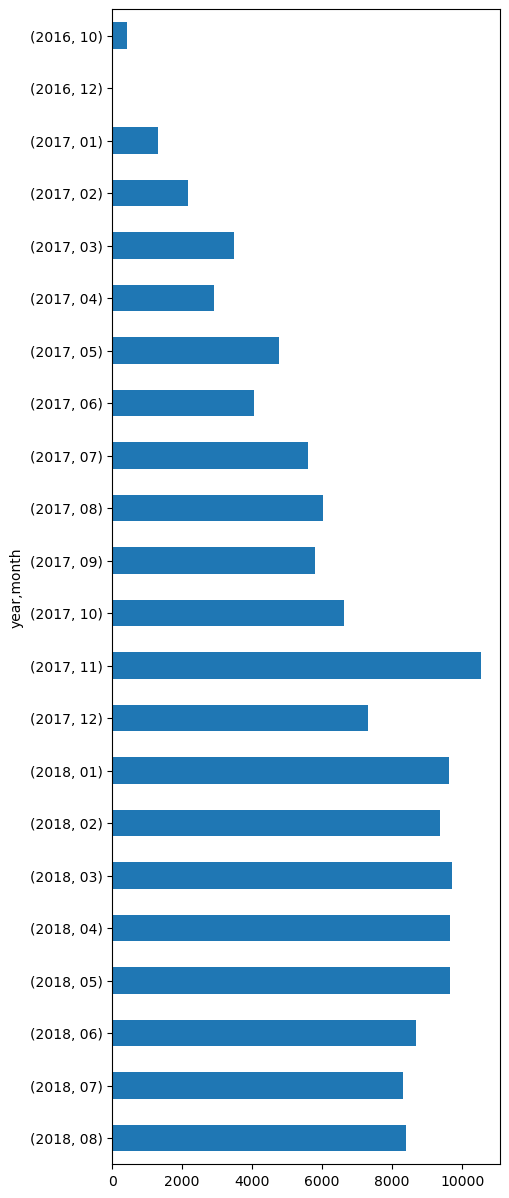

In [54]:
totaldata.sort_values(by=['year','month'],ascending=[False,False]).groupby(['year','month'],sort=False).order_item_id.sum().plot(kind='barh',figsize=[5,15])

<Axes: ylabel='year,week'>

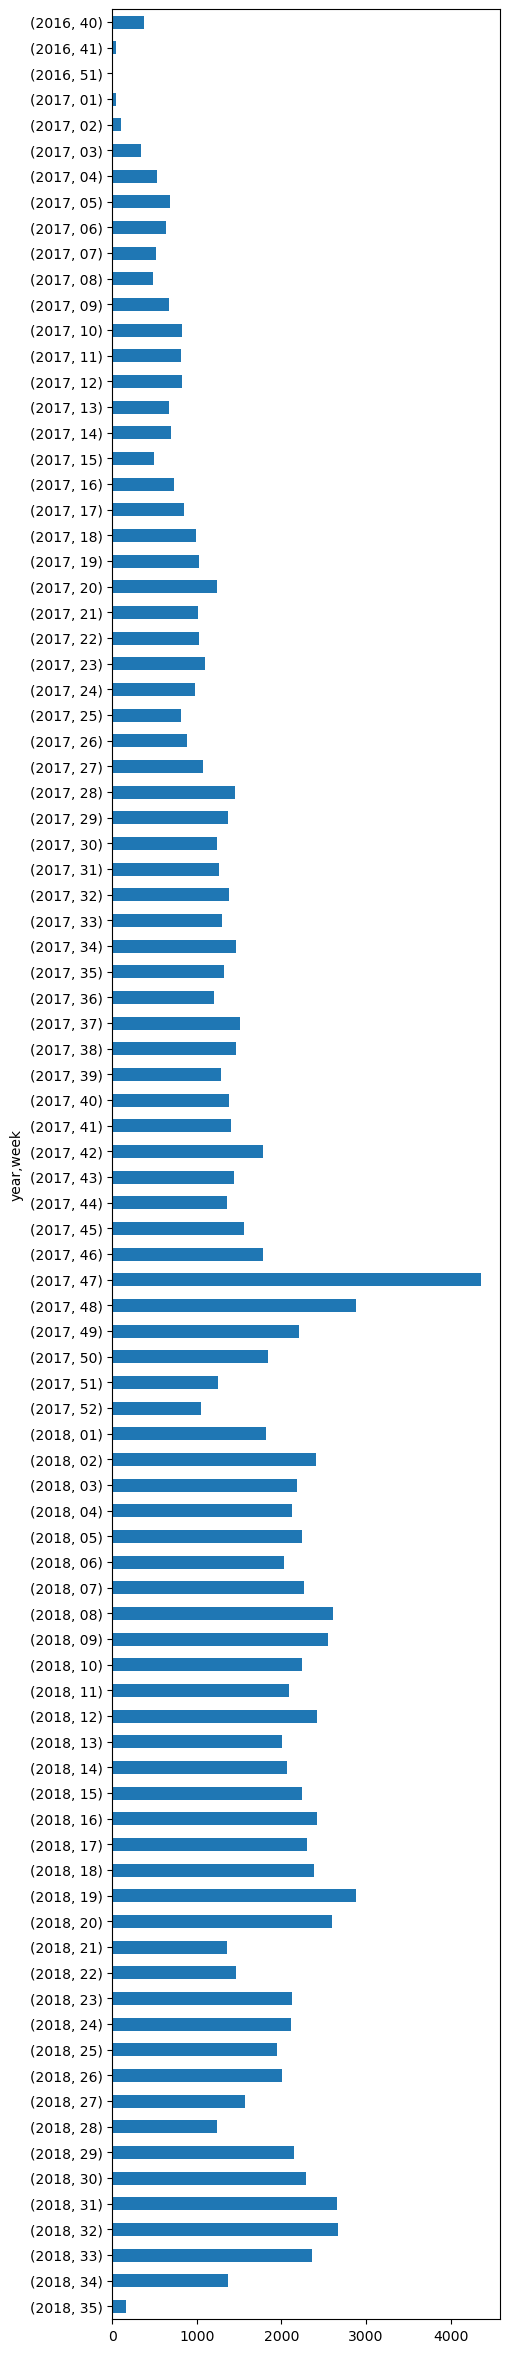

In [56]:
totaldata.sort_values(by=['year','week'],ascending=[False,False]).groupby(['year','week'],sort=False).order_item_id.sum().plot(kind='barh',figsize=[5,30])

<Axes: ylabel='year,month,day'>

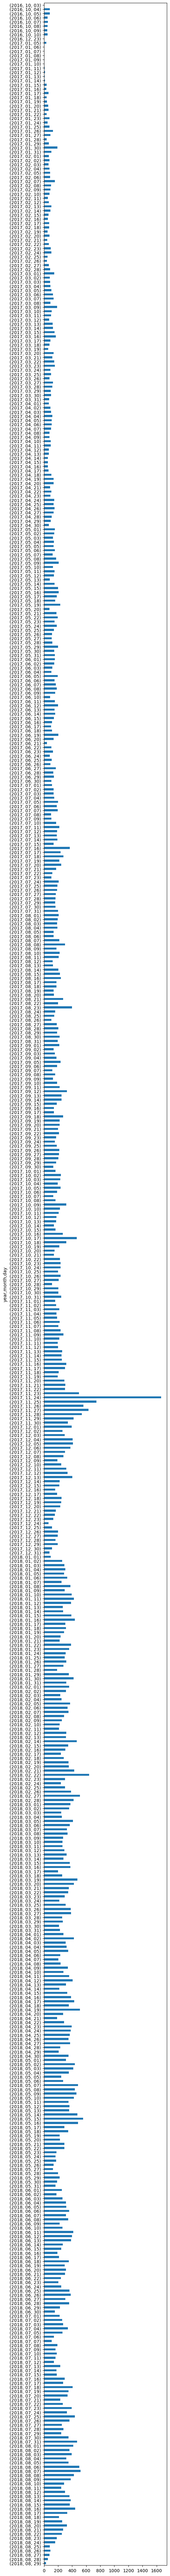

In [59]:
totaldata.sort_values(by=['year','month','day'],ascending=[False,False,False]).groupby(['year','month','day'],sort=False).order_item_id.sum().plot(kind='barh',figsize=[5,105])

In [62]:
totaldata.groupby('payment_type').order_item_id.sum().sort_values(ascending=False)

payment_type
credit_card    98429
UPI            27334
voucher         6803
debit_card      1858
Name: order_item_id, dtype: int64

In [64]:
#f Popular Products by month, seller, state, category.
popprodbymonth=totaldata.groupby(['year','month','product_id']).order_id.count().rename('count').reset_index()

In [68]:
popprodbymonth.sort_values(['year','month', 'count'], ascending=[True,True,False]).drop_duplicates(['year','month']).reset_index(drop=True)

,year,month,product_id,count
0,2016,10,eba7488e1c67729f045ab43fac426f2e,10
1,2016,12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
2,2017,01,985c412b0ac92ed9d8a76bbeab6d44eb,16
3,2017,02,42fffc68ff7e8176f11baaf4a4227557,13
4,2017,03,7e0dc102074f8285580c9777f79c90cf,44
5,2017,04,99a4788cb24856965c36a24e339b6058,39
6,2017,05,99a4788cb24856965c36a24e339b6058,66
7,2017,06,42a2c92a0979a949ca4ea89ec5c7b934,70
8,2017,07,f1c7f353075ce59d8a6f3cf58f419c9c,62
9,2017,08,f1c7f353075ce59d8a6f3cf58f419c9c,52


In [70]:
popprodbyseller=totaldata.groupby(['seller_id','product_id']).product_id.count().rename('count').reset_index()

In [74]:
popprodbyseller.sort_values(by='count',ascending=False).drop_duplicates('seller_id').reset_index(drop=True)

,seller_id,product_id,count
0,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,509
2,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,507
3,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,345
4,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,284
...,...,...,...
2852,85e7c62c1d6ea078c3897424f867a7c8,ac00a8b91ef562f9c4216e203f1bd093,1
2853,85ecf03781da592876b7844acc1b729f,ffaf0af7eebb57c7f262b51ebb05dfd6,1
2854,8629a7efec1aab257e58cda559f03ba7,2c0794594e639865fe2ff4085c935544,1
2855,83c8aafbefb034674a70de0eac5b8954,ac69f0bde551e0558dead5f71f7c70e3,1


In [79]:
popprodbystate=totaldata.groupby(['customer_state','product_id']).product_id.count().rename('count').reset_index()

In [82]:
popprodbystate.sort_values(by='count',ascending=False).drop_duplicates('customer_state').reset_index(drop=True)

,customer_state,product_id,count
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,338
1,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,51
2,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
3,Madhya Pradesh,d1c427060a0f73f6b889a5c7c61f2ac4,27
4,Karnataka,422879e10f46682990de24d770e7f83d,25
5,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
6,Haryana,35afc973633aaeb6b877ff57b2793310,17
7,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
8,Kerala,aca2eb7d00ea1a7b8ebd4e68314663af,13
9,Tamil Nadu,99a4788cb24856965c36a24e339b6058,13


In [95]:
popprodbycat=totaldata.groupby(['product_category_name','product_id']).product_id.count().rename('count').reset_index()
popprodbycat.sort_values(by='count',ascending=False).drop_duplicates('product_category_name').reset_index().drop(columns='index')

,product_category_name,product_id,count
0,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,515
2,Garden_Tools,422879e10f46682990de24d770e7f83d,507
3,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,345
4,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,324
...,...,...,...
66,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
67,Music,4befae07dba4384f6d8237ad1e7f8294,4
68,La_Cuisine,33900d427fa4bd3f509cdacda72e84a3,3
69,Fashion_Childrens_Clothes,57bdf3098169cccdb62221bd3e089cbd,3


In [103]:
#g. Popular categories by state, month
popcatbystate=totaldata.groupby(['customer_state','product_category_name']).product_category_name.count().rename('count').reset_index()
popcatbystate.sort_values(by='count',ascending=False).drop_duplicates('customer_state').reset_index().drop(columns='index')

,customer_state,product_category_name,count
0,Andhra Pradesh,Bed_Bath_Table,7568
1,Gujarat,Bed_Bath_Table,793
2,Chhattisgarh,Bed_Bath_Table,727
3,Karnataka,Bed_Bath_Table,405
4,Madhya Pradesh,Bed_Bath_Table,338
5,Delhi,Health_Beauty,325
6,Haryana,Bed_Bath_Table,291
7,Maharashtra,Bed_Bath_Table,220
8,Tamil Nadu,Bed_Bath_Table,218
9,Jammu & Kashmir,Bed_Bath_Table,183


In [108]:
popcatbymonth=totaldata.groupby(['year','month','product_category_name']).product_category_name.count().rename('count').reset_index()
popcatbymonth.sort_values(by=['year','month','count'],ascending=[True,True,False]).drop_duplicates(['year','month']).reset_index().drop(columns='index')

,year,month,product_category_name,count
0,2016,10,Furniture_Decor,78
1,2016,12,Fashion_Bags_Accessories,1
2,2017,01,Furniture_Decor,199
3,2017,02,Furniture_Decor,268
4,2017,03,Furniture_Decor,324
5,2017,04,Bed_Bath_Table,306
6,2017,05,Bed_Bath_Table,418
7,2017,06,Bed_Bath_Table,418
8,2017,07,Bed_Bath_Table,625
9,2017,08,Bed_Bath_Table,583


In [111]:
#h. List top 10 most expensive products sorted by price
totaldata[['product_id','price']].sort_values(by='price',ascending=False).head(10).reset_index(drop=True)

,product_id,price
0,489ae2aa008f021502940f251d4cce7f,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,a6492cc69376c469ab6f61d8f44de961,4799.00
4,c3ed642d592594bb648ff4a04cee2747,4690.00
5,259037a6a41845e455183f89c5035f18,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
9,6902c1962dd19d540807d0ab8fade5c6,3999.90


In [114]:
#Q2. Performing Customers/sellers Segmentation
#a. Divide the customers into groups based on the revenue generated
totaldata['revenue']=np.where(totaldata.payment_value>500,'High',np.where(totaldata.payment_value>100,'Medium','Low'))

In [115]:
totaldata.groupby('revenue').customer_id.count()

revenue
High       5718
Low       52343
Medium    54138
Name: customer_id, dtype: int64

In [117]:
#b. Divide the sellers into groups based on the revenue generated
sellerbyrev=totaldata.groupby('seller_id').payment_value.sum().sort_values(ascending=False).reset_index()

In [121]:
sellerbyrev['revenue']=np.where(sellerbyrev.payment_value>5000,'High',np.where(sellerbyrev.payment_value>500,'Medium','Low'))

In [123]:
sellerbyrev.groupby('revenue').seller_id.count()

revenue
High       728
Low        909
Medium    1220
Name: seller_id, dtype: int64

In [125]:
#Q3. Cross-Selling (Which products are selling together)
#For 2 Products
cross_sell=totaldata[totaldata.order_id.duplicated(keep=False)]

In [127]:
cross_sell = cross_sell.drop_duplicates(subset=['order_id','product_id'])

In [139]:
cross_sell['cross_sell'] = cross_sell.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))

from itertools import combinations
from collections import Counter

count2 = Counter()
for i in cross_sell['cross_sell']:
    row = i.split(',')
    count2.update(Counter(combinations(row,2)))
Cross2 = pd.DataFrame(count2.most_common(10),columns=['Products','No. of orders'])
Cross2.set_index('Products',inplace=True)
Cross2

,No. of orders
Products,
"(36f60d45225e60c7da4558b070ce4b60, e53e557d5a159f5aa2c5e995dfdf244b)",64
"(99a4788cb24856965c36a24e339b6058, 35afc973633aaeb6b877ff57b2793310)",61
"(f4f67ccaece962d013a4e1d7dc3a61f7, 4fcb3d9a5f4871e8362dfedbdb02b064)",34
"(389d119b48cf3043d311335e499d9c6b, 422879e10f46682990de24d770e7f83d)",25
"(389d119b48cf3043d311335e499d9c6b, 53759a2ecddad2bb87a079a1f1519f73)",24
"(36f60d45225e60c7da4558b070ce4b60, 3f14d740544f37ece8a9e7bc8349797e)",20
"(368c6c730842d78016ad823897a372db, 53759a2ecddad2bb87a079a1f1519f73)",19
"(ad0a798e7941f3a5a2fb8139cb62ad78, 946344697156947d846d27fe0d503033)",19
"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39e1064258aa1e932269894)",17


In [144]:
#For 3 Products
count3 = Counter()
for i in cross_sell['cross_sell']:
    row = i.split(',')
    count3.update(Counter(combinations(row,3)))
Cross3 = pd.DataFrame(count3.most_common(10),columns=['Products','No. of orders'])
Cross3.set_index('Products',inplace=True)
Cross3

,No. of orders
Products,
"(ad0a798e7941f3a5a2fb8139cb62ad78, 946344697156947d846d27fe0d503033, 23ab7bb9eac81e85ec43ed71064cf7ce)",9
"(b9900407a55cb2b306ae612415c3340e, e2cac69b319c0f8a21dbf04b925121bf, 55bfa0307d7a46bed72c492259921231)",9
"(ad0a798e7941f3a5a2fb8139cb62ad78, b0c89945c034268074f5f80b362bda34, 946344697156947d846d27fe0d503033)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 21b524c4c060169fa75ccf08c7da4627)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 309dd69eb83cea38c51709d62befe1a4)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 0cf2faf9749f53924cea652a09d8e327)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 0de59eddc63167215c972b0d785ffa7b)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 5dae498eff2d80057f56122235a36aff)",8
"(1065e0ebef073787a7bf691924c60eeb, 4a5c3967bfd3629fe07ef4d0cc8c3818, 678c229b41c0e497d35a25a8be1cc631)",8


In [146]:
#4. Payment Behaviour
#a. How customers are paying?
totaldata.groupby('payment_installments').customer_id.count().sort_values(ascending=False)

payment_installments
1     55972
2     13058
3     11231
4      7626
10     6527
5      5752
8      4831
6      4383
7      1708
9       693
12      160
15       88
18       34
24       34
11       25
20       20
13       18
14       14
16        7
17        7
21        6
0         3
22        1
23        1
Name: customer_id, dtype: int64

In [150]:
#b. Which payment channels are used by most customers?
totaldata.groupby('payment_type').customer_id.count().sort_values(ascending=False)

payment_type
credit_card    82790
UPI            21820
voucher         5987
debit_card      1602
Name: customer_id, dtype: int64

In [155]:
#Q5. Customer satisfaction towards category & product
#a. Which categories (top 10) are maximum rated & minimum rated?
toptencat=totaldata.groupby('product_category_name').review_score.agg([np.mean,'count']).sort_values(by='count',ascending=False).reset_index().head(10)

In [159]:
toptencat.sort_values(by='mean',ascending=False).drop(columns='count').reset_index(drop=True)

,product_category_name,mean
0,Health_Beauty,4.170375
1,Sports_Leisure,4.151469
2,Housewares,4.106663
3,Auto,4.083666
4,Garden_Tools,4.069899
5,Watches_Gifts,4.053241
6,Telephony,3.984242
7,Computers_Accessories,3.980164
8,Furniture_Decor,3.941720
9,Bed_Bath_Table,3.892365


In [162]:
#b. Which products (top10) are maximum rated & minimum rated?
toptenprod=totaldata.groupby('product_id').review_score.agg([np.mean,'count']).sort_values(by='count',ascending=False).reset_index().head(10)

In [166]:
toptenprod.sort_values(by='mean',ascending=False).drop(columns='count').reset_index(drop=True)

,product_id,mean
0,154e7e31ebfa092203795c972e5804a6,4.369718
1,3dd2a17168ec895c781a9191c1e95ad7,4.206522
2,53b36df67ebb7c41585e8d54d6772e08,4.197531
3,d1c427060a0f73f6b889a5c7c61f2ac4,4.171014
4,389d119b48cf3043d311335e499d9c6b,4.121891
5,aca2eb7d00ea1a7b8ebd4e68314663af,4.034156
6,422879e10f46682990de24d770e7f83d,3.921105
7,368c6c730842d78016ad823897a372db,3.918987
8,99a4788cb24856965c36a24e339b6058,3.899029
9,53759a2ecddad2bb87a079a1f1519f73,3.877238


In [169]:
#c. Average rating by location, seller, product, category, month etc.
totaldata.groupby('customer_city').review_score.mean()

customer_city
Aadityana         4.064516
Aambaliyasan      3.500000
Aantaliya         3.903846
Aarambhada        3.560000
Abiramam          5.000000
                    ...   
Zamin Uthukuli    4.000000
Ziauddin Pur      4.129032
Zira              4.600000
Zirakpur          4.500000
Ziro              4.018519
Name: review_score, Length: 4008, dtype: float64

In [171]:
totaldata.groupby('seller_id').review_score.mean()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.944915
002100f778ceb8431b7a1020ff7ab48f    4.086207
004c9cd9d87a3c30c522c48c4fc07416    4.143713
00720abe85ba0859807595bbf045a33b    3.653846
                                      ...   
ffc470761de7d0232558ba5e786e57b7    4.281250
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.285714
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.881356
ffff564a4f9085cd26170f4732393726    3.250000
Name: review_score, Length: 2857, dtype: float64

In [174]:
totaldata.groupby('product_id').review_score.mean()

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
00088930e925c41fd95ebfe695fd2655    4.0
0009406fd7479715e4bef61dd91f2462    1.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
                                   ... 
fff6177642830a9a94a0f2cba5e476d1    4.5
fff81cc3158d2725c0655ab9ba0f712c    4.0
fff9553ac224cec9d15d49f5a263411f    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
fffe9eeff12fcbd74a2f2b007dde0c58    4.0
Name: review_score, Length: 31040, dtype: float64

In [179]:
totaldata.groupby('product_category_name').review_score.mean()

product_category_name
Agro_Industry_And_Commerce    4.225410
Air_Conditioning              3.993127
Art                           4.020000
Arts_And_Craftmanship         4.125000
Audio                         3.828042
                                ...   
Stationery                    4.226297
Tablets_Printing_Image        4.045977
Telephony                     3.984242
Toys                          4.190200
Watches_Gifts                 4.053241
Name: review_score, Length: 71, dtype: float64

In [182]:
totaldata.groupby(['year','month']).review_score.mean()

year  month
2016  10       3.846608
      12       5.000000
2017  01       4.183525
      02       4.171157
      03       4.110512
      04       4.084496
      05       4.181114
      06       4.176306
      07       4.151830
      08       4.261451
      09       4.174815
      10       4.085570
      11       3.877018
      12       3.984807
2018  01       3.988004
      02       3.759477
      03       3.739748
      04       4.101982
      05       4.155296
      06       4.201445
      07       4.256498
      08       4.234377
Name: review_score, dtype: float64